# <CENTER>2023  ADANI STOCK PRICE PREDICTION

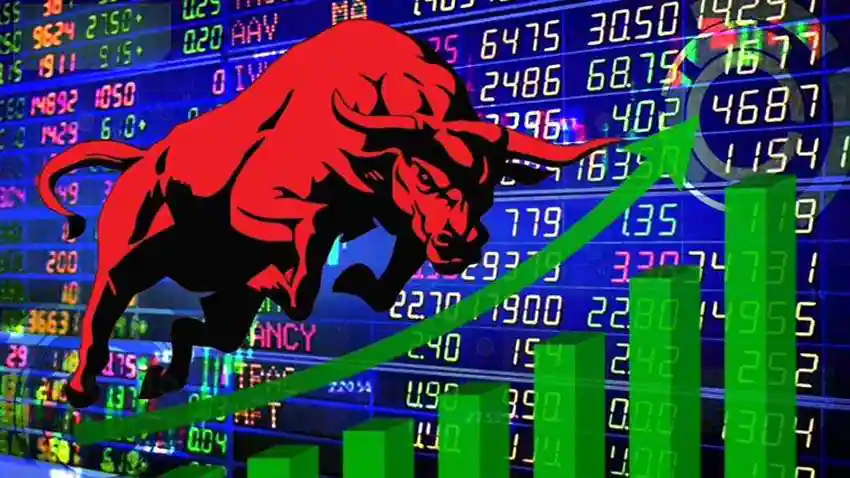

### What is the Stock Market? The stock market refers to the collection of markets and exchanges where regular activities of buying, selling, and issuance of shares of publicly-held companies take place. Such financial activities are conducted through institutionalized formal exchanges or over-the-counter (OTC) marketplaces which operate under a defined set of regulations. There can be multiple stock trading venues in a country or a region which allow transactions in stocks and other forms of securities.

## DESCRIPTION OF COLUMNS

#### Date - Day, month and year

#### Open - Opening price of the ETF

#### High - Highest price of the day

#### Low - Lowest price of the day

#### Close - Closing price (usually taken as the prediction target)

#### Volume - The volume traded during the day

#### PREV. CLOSE - Previous Close Value

#### LTP - Last Traded Price

#### VWAP - Volume Weighted Average Price

#### 52W H - 52 Week High price

#### 52W L - 52 Week Lowest price

#### Volume - volume of transaction

#### Value - Turn over in lakhs

#### No. of trades

# <CENTER>IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,RandomForestRegressor
from sklearn.svm import LinearSVR


In [2]:
df=pd.read_csv('ADANIENT.csv')
df

,Date,series,OPEN,HIGH,LOW,PREV.CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No_of_trades
0,08-May-2023,EQ,"1,920.30","1,926.90","1,876.00","1,920.30","1,892.00","1,887.50","1,893.79","4,190.00","1,017.45","2,835,197","5,369,263,788.00","101,164"
1,05-May-2023,EQ,"1,954.80","1,955.00","1,903.15","1,911.25","1,919.20","1,920.30","1,930.87","4,190.00","1,017.45","6,137,744","11,851,215,203.30","207,327"
2,04-May-2023,EQ,"1,839.05","1,935.00","1,839.05","1,839.00","1,925.00","1,911.25","1,886.78","4,190.00","1,017.45","4,842,127","9,136,040,023.05","168,632"
3,03-May-2023,EQ,"1,919.00","1,940.00","1,785.35","1,919.85","1,834.00","1,839.00","1,856.55","4,190.00","1,017.45","5,849,432","10,859,776,808.70","228,734"
4,02-May-2023,EQ,"1,935.00","1,966.00","1,908.00","1,924.95","1,919.00","1,919.85","1,932.34","4,190.00","1,017.45","3,813,963","7,369,855,740.30","143,521"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,06-Jan-2023,EQ,"3,829.00","3,868.25","3,797.05","3,829.80","3,824.00","3,824.25","3,834.29","4,190.00","1,528.80","912,159","3,497,485,465.55","44,367"
80,05-Jan-2023,EQ,"3,827.05","3,842.40","3,756.90","3,827.05","3,839.00","3,829.80","3,813.43","4,190.00","1,528.80","997,006","3,802,009,161.60","49,242"
81,04-Jan-2023,EQ,"3,839.00","3,874.95","3,803.60","3,830.95","3,822.00","3,827.05","3,833.86","4,190.00","1,528.80","1,028,377","3,942,649,146.95","47,586"
82,03-Jan-2023,EQ,"3,841.90","3,852.85","3,791.00","3,841.20","3,828.10","3,830.95","3,830.96","4,190.00","1,528.80","799,905","3,064,403,987.15","38,042"


In [3]:
df.shape

(84, 14)

In [4]:
df.describe()

,Date,series,OPEN,HIGH,LOW,PREV.CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No_of_trades
count,84,84,84,84,84,84,84,84,84,84,84,84,84,84
unique,84,1,83,83,84,83,80,83,84,1,3,84,84,84
top,08-May-2023,EQ,"1,855.00","1,940.00","1,876.00","1,839.00","1,922.00","1,839.00","1,893.79","4,190.00","1,017.45","2,835,197","5,369,263,788.00","101,164"
freq,1,84,2,2,1,2,2,2,1,84,61,1,1,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           84 non-null     object
 1   series         84 non-null     object
 2   OPEN           84 non-null     object
 3   HIGH           84 non-null     object
 4   LOW            84 non-null     object
 5   PREV.CLOSE     84 non-null     object
 6   ltp            84 non-null     object
 7   close          84 non-null     object
 8   vwap           84 non-null     object
 9   52W H          84 non-null     object
 10  52W L          84 non-null     object
 11  VOLUME         84 non-null     object
 12  VALUE          84 non-null     object
 13  No_of_trades   84 non-null     object
dtypes: object(14)
memory usage: 9.3+ KB


In [6]:
df.isnull().mean()*100

Date             0.0
series           0.0
OPEN             0.0
HIGH             0.0
LOW              0.0
PREV.CLOSE       0.0
ltp              0.0
close            0.0
vwap             0.0
52W H            0.0
52W L            0.0
VOLUME           0.0
VALUE            0.0
No_of_trades     0.0
dtype: float64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           84 non-null     object
 1   series         84 non-null     object
 2   OPEN           84 non-null     object
 3   HIGH           84 non-null     object
 4   LOW            84 non-null     object
 5   PREV.CLOSE     84 non-null     object
 6   ltp            84 non-null     object
 7   close          84 non-null     object
 8   vwap           84 non-null     object
 9   52W H          84 non-null     object
 10  52W L          84 non-null     object
 11  VOLUME         84 non-null     object
 12  VALUE          84 non-null     object
 13  No_of_trades   84 non-null     object
dtypes: object(14)
memory usage: 9.3+ KB


In [8]:
df.duplicated().sum()

0

## <CENTER>CHANGING DATATYPE0F COLUMNS AND RPLACING COMA FROM VALUES

In [9]:
df['OPEN '] = df['OPEN '].str.replace(',', '').astype(float).astype(int)

In [10]:
df['HIGH '] = df['HIGH '].str.replace(',', '').astype(float).astype(int)

In [11]:
df['LOW '] = df['LOW '].str.replace(',', '').astype(float).astype(int)

In [12]:
df['PREV.CLOSE '] = df['PREV.CLOSE '].str.replace(',', '').astype(float).astype(int)

In [13]:
df['ltp '] = df['ltp '].str.replace(',', '').astype(float).astype(int)

In [14]:
df['close '] = df['close '].str.replace(',', '').astype(float).astype(int)

In [15]:
df['No_of_trades '] = df['No_of_trades '].str.replace(',', '').astype(float).astype(int)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           84 non-null     object
 1   series         84 non-null     object
 2   OPEN           84 non-null     int32 
 3   HIGH           84 non-null     int32 
 4   LOW            84 non-null     int32 
 5   PREV.CLOSE     84 non-null     int32 
 6   ltp            84 non-null     int32 
 7   close          84 non-null     int32 
 8   vwap           84 non-null     object
 9   52W H          84 non-null     object
 10  52W L          84 non-null     object
 11  VOLUME         84 non-null     object
 12  VALUE          84 non-null     object
 13  No_of_trades   84 non-null     int32 
dtypes: int32(7), object(7)
memory usage: 7.0+ KB


## <CENTER>UNIVARIATE ANALYSIS

### HISTOGRAM

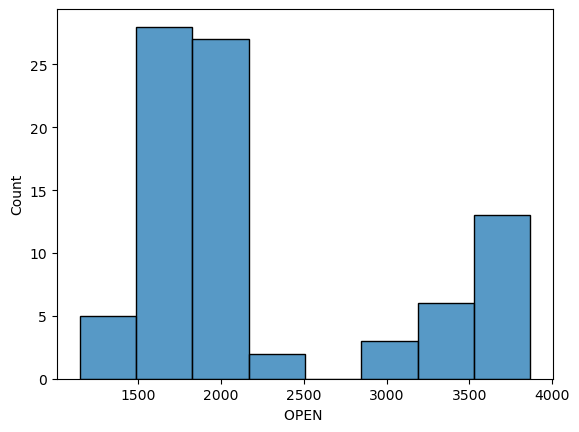

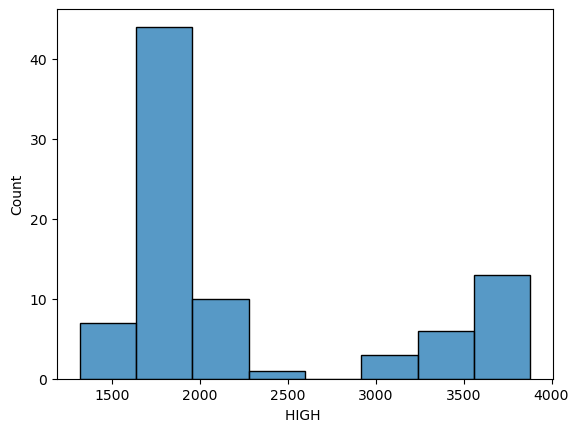

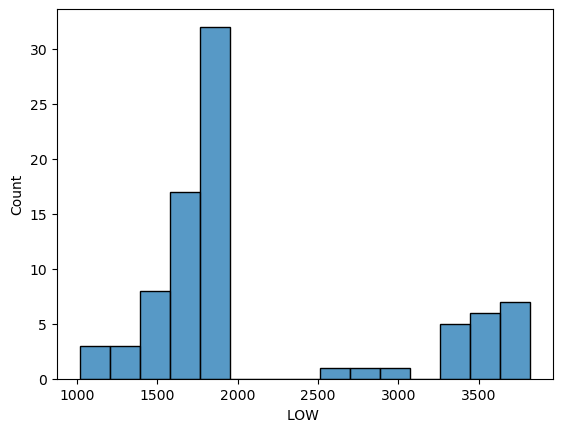

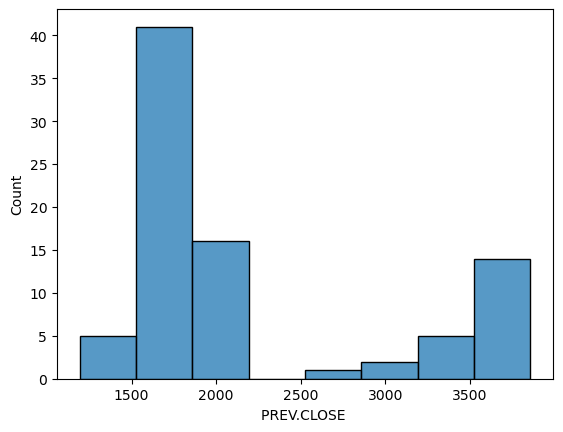

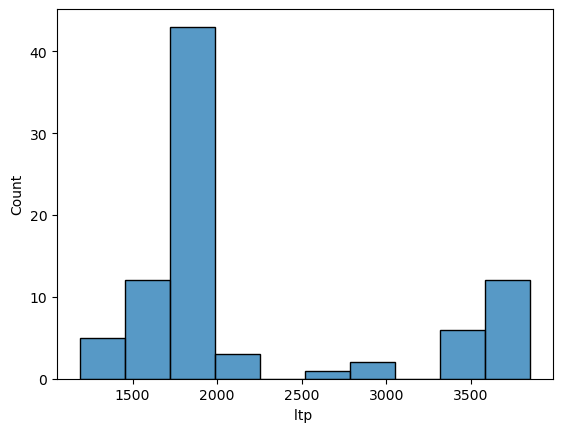

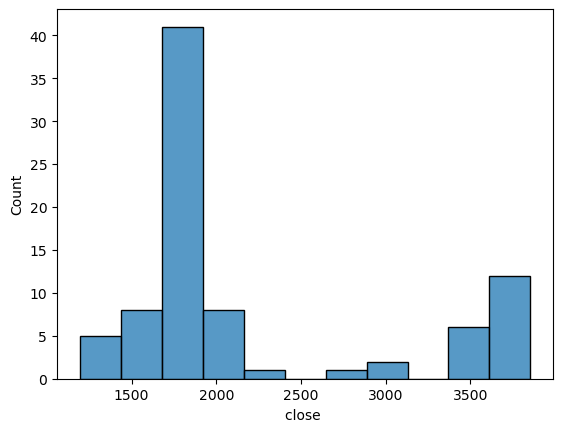

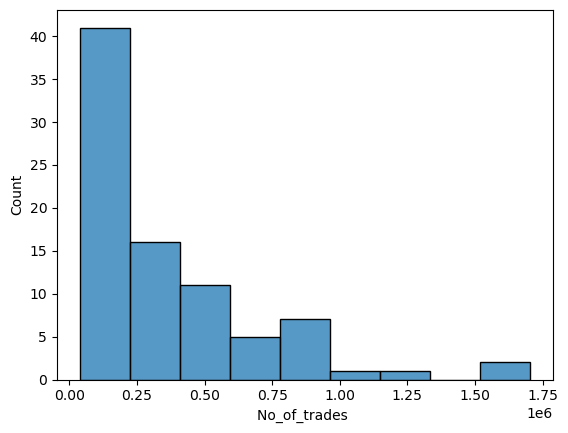

In [17]:
for i in df.columns:
    if df[i].dtype!='object':
        sns.histplot(x=df[i])
        plt.show();

### KDE PLOT

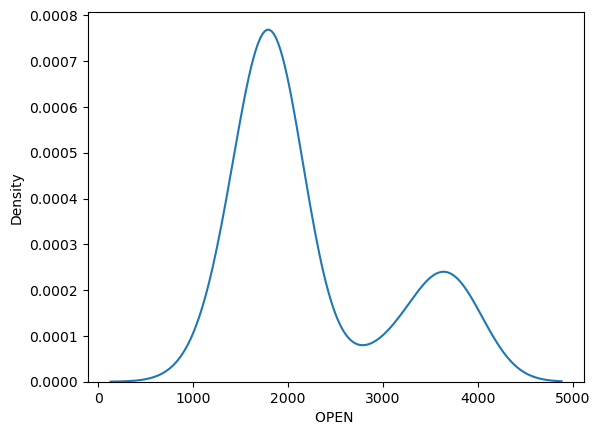

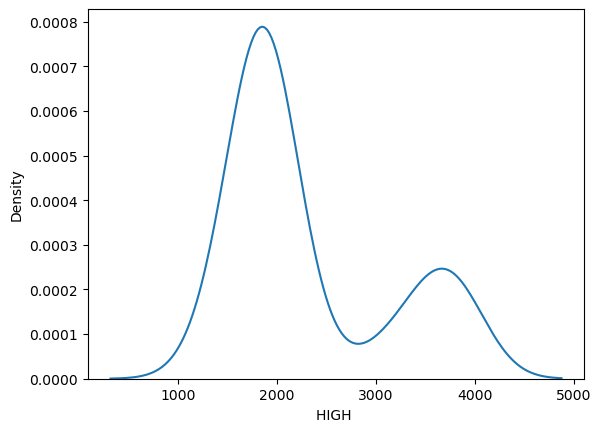

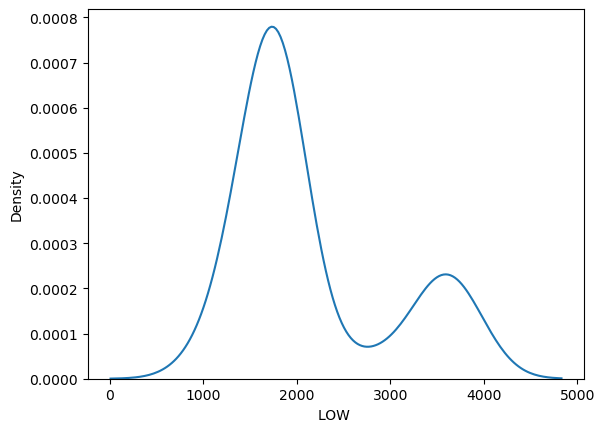

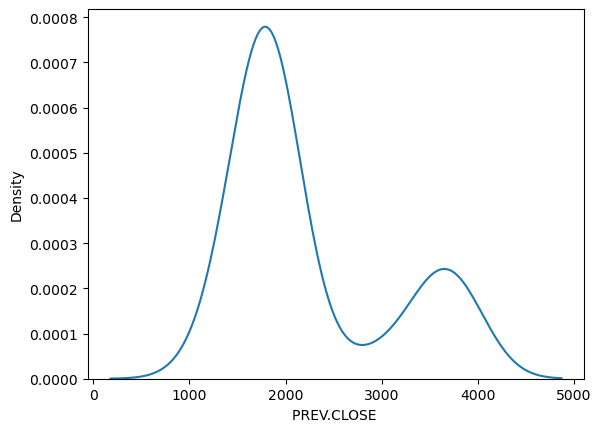

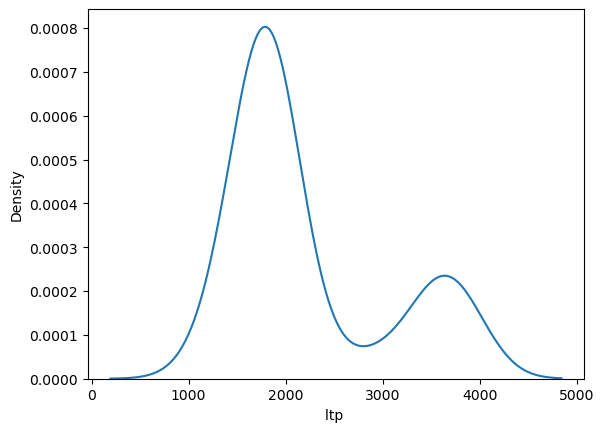

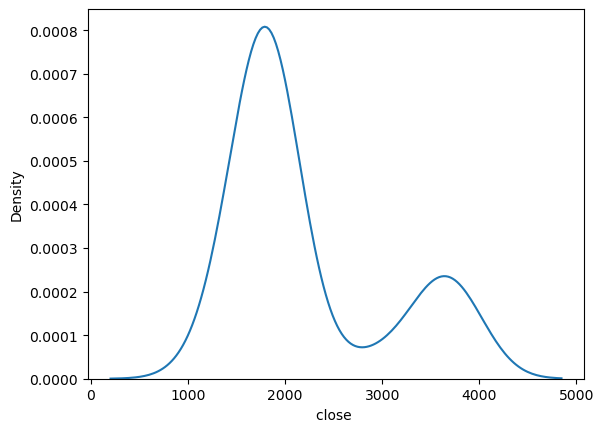

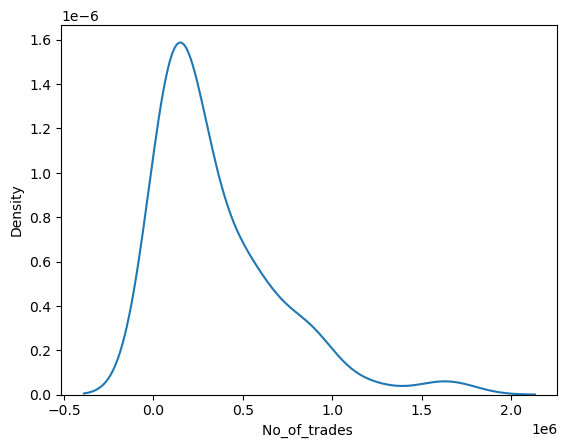

In [18]:
for i in df.columns:
    if df[i].dtype!='object':
        sns.kdeplot(x=df[i])
        plt.show();

### BOXPLOT

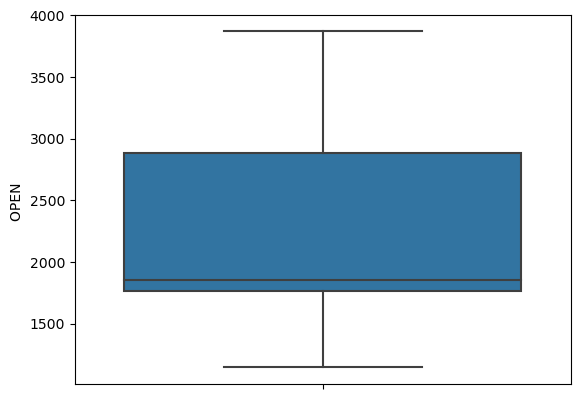

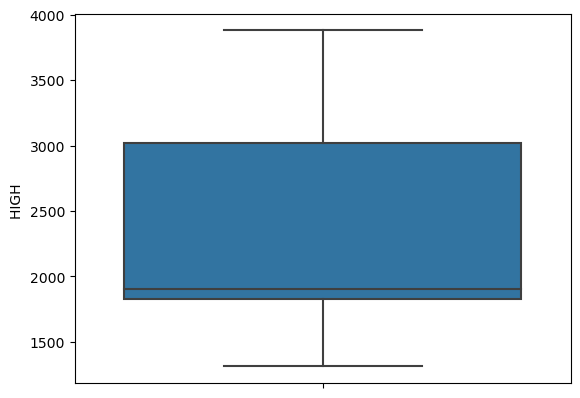

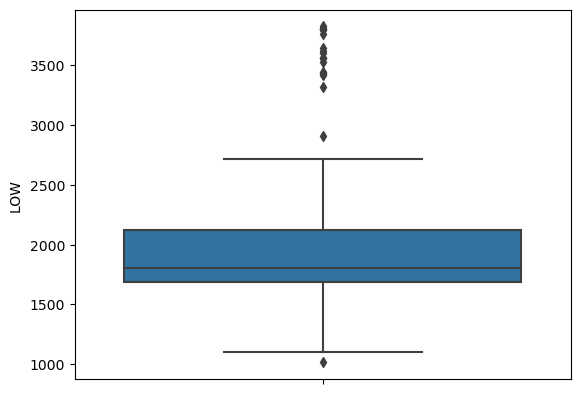

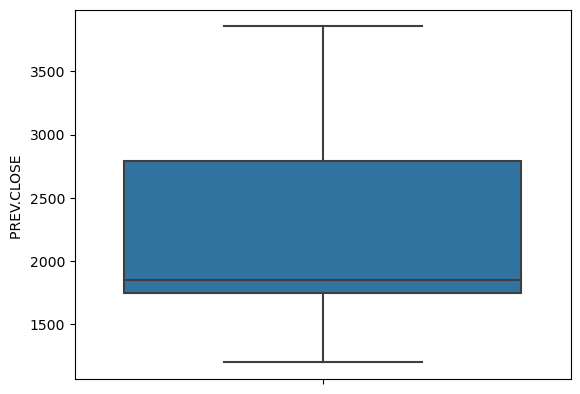

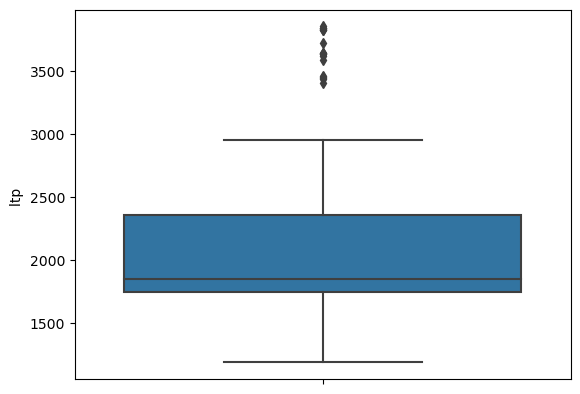

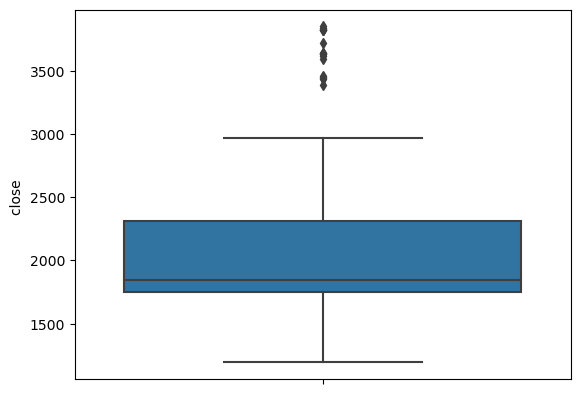

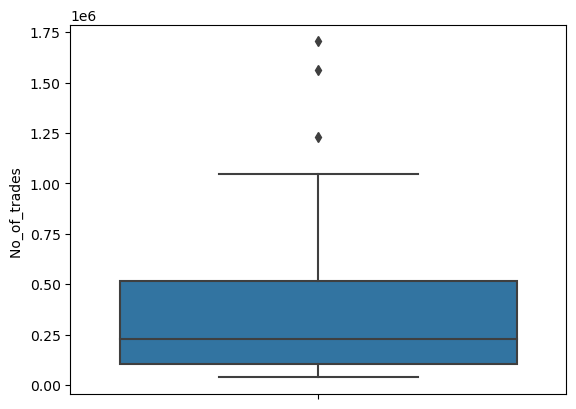

In [19]:
for i in df.columns:
    if df[i].dtype!='object':
        sns.boxplot(y=df[i])
        plt.show();
        

##  <CENTER>MULTIVARIATE ANALYSIS

## BARPLOTS

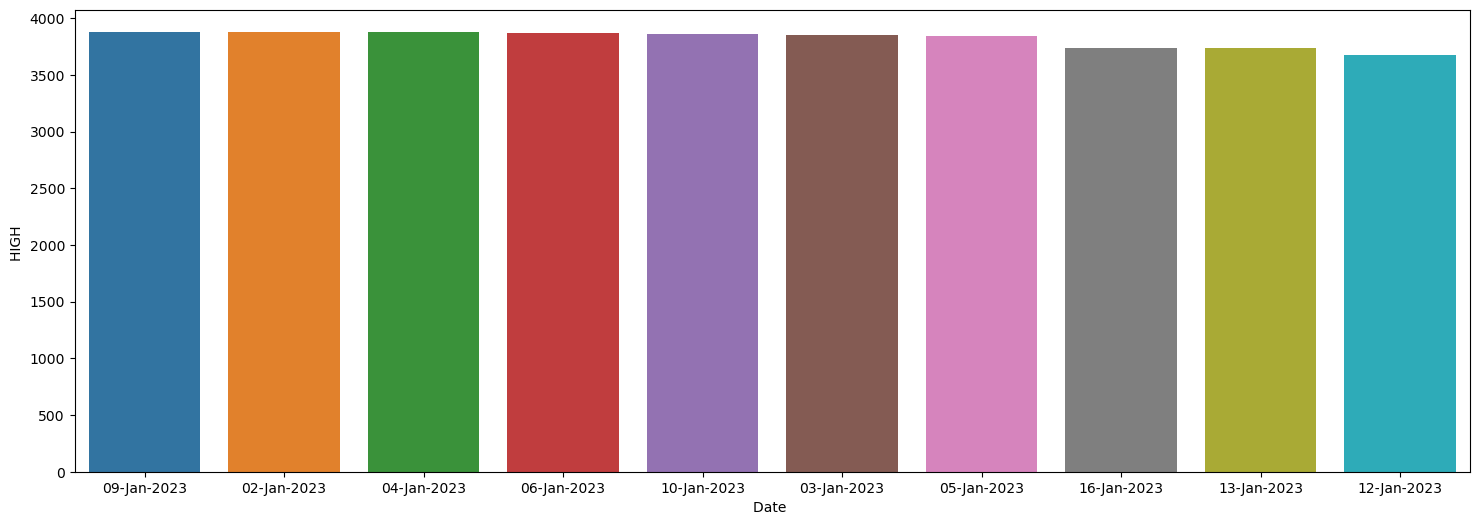

In [20]:
plt.figure(figsize=(18, 6))
sns.barplot(x='Date ', y='HIGH ', data=df.sort_values(by='HIGH ', ascending=False)[:10]);

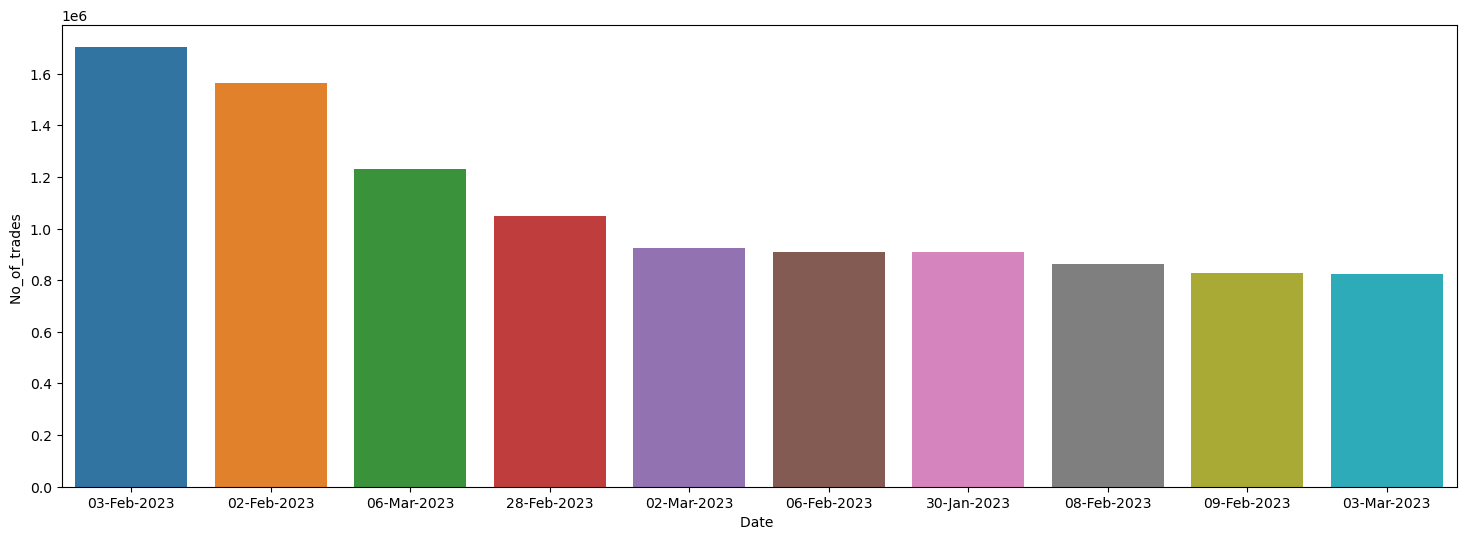

In [21]:
plt.figure(figsize=(18, 6))
sns.barplot(x='Date ', y='No_of_trades ', data=df.sort_values(by='No_of_trades ', ascending=False)[:10]);

## SUBPLOTS

OPEN                Axes(0.125,0.11;0.0945122x0.77)
HIGH             Axes(0.238415,0.11;0.0945122x0.77)
LOW              Axes(0.351829,0.11;0.0945122x0.77)
PREV.CLOSE       Axes(0.465244,0.11;0.0945122x0.77)
ltp              Axes(0.578659,0.11;0.0945122x0.77)
close            Axes(0.692073,0.11;0.0945122x0.77)
No_of_trades     Axes(0.805488,0.11;0.0945122x0.77)
dtype: object

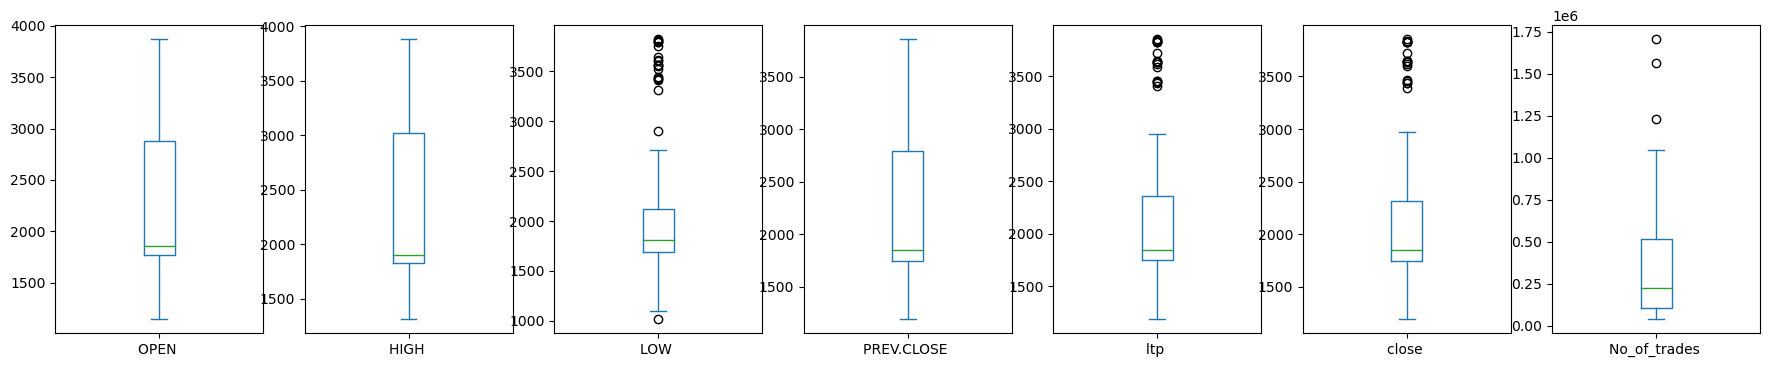

In [22]:
df.plot.box(figsize=(22,4),subplots=True)

## PAIRPLOT

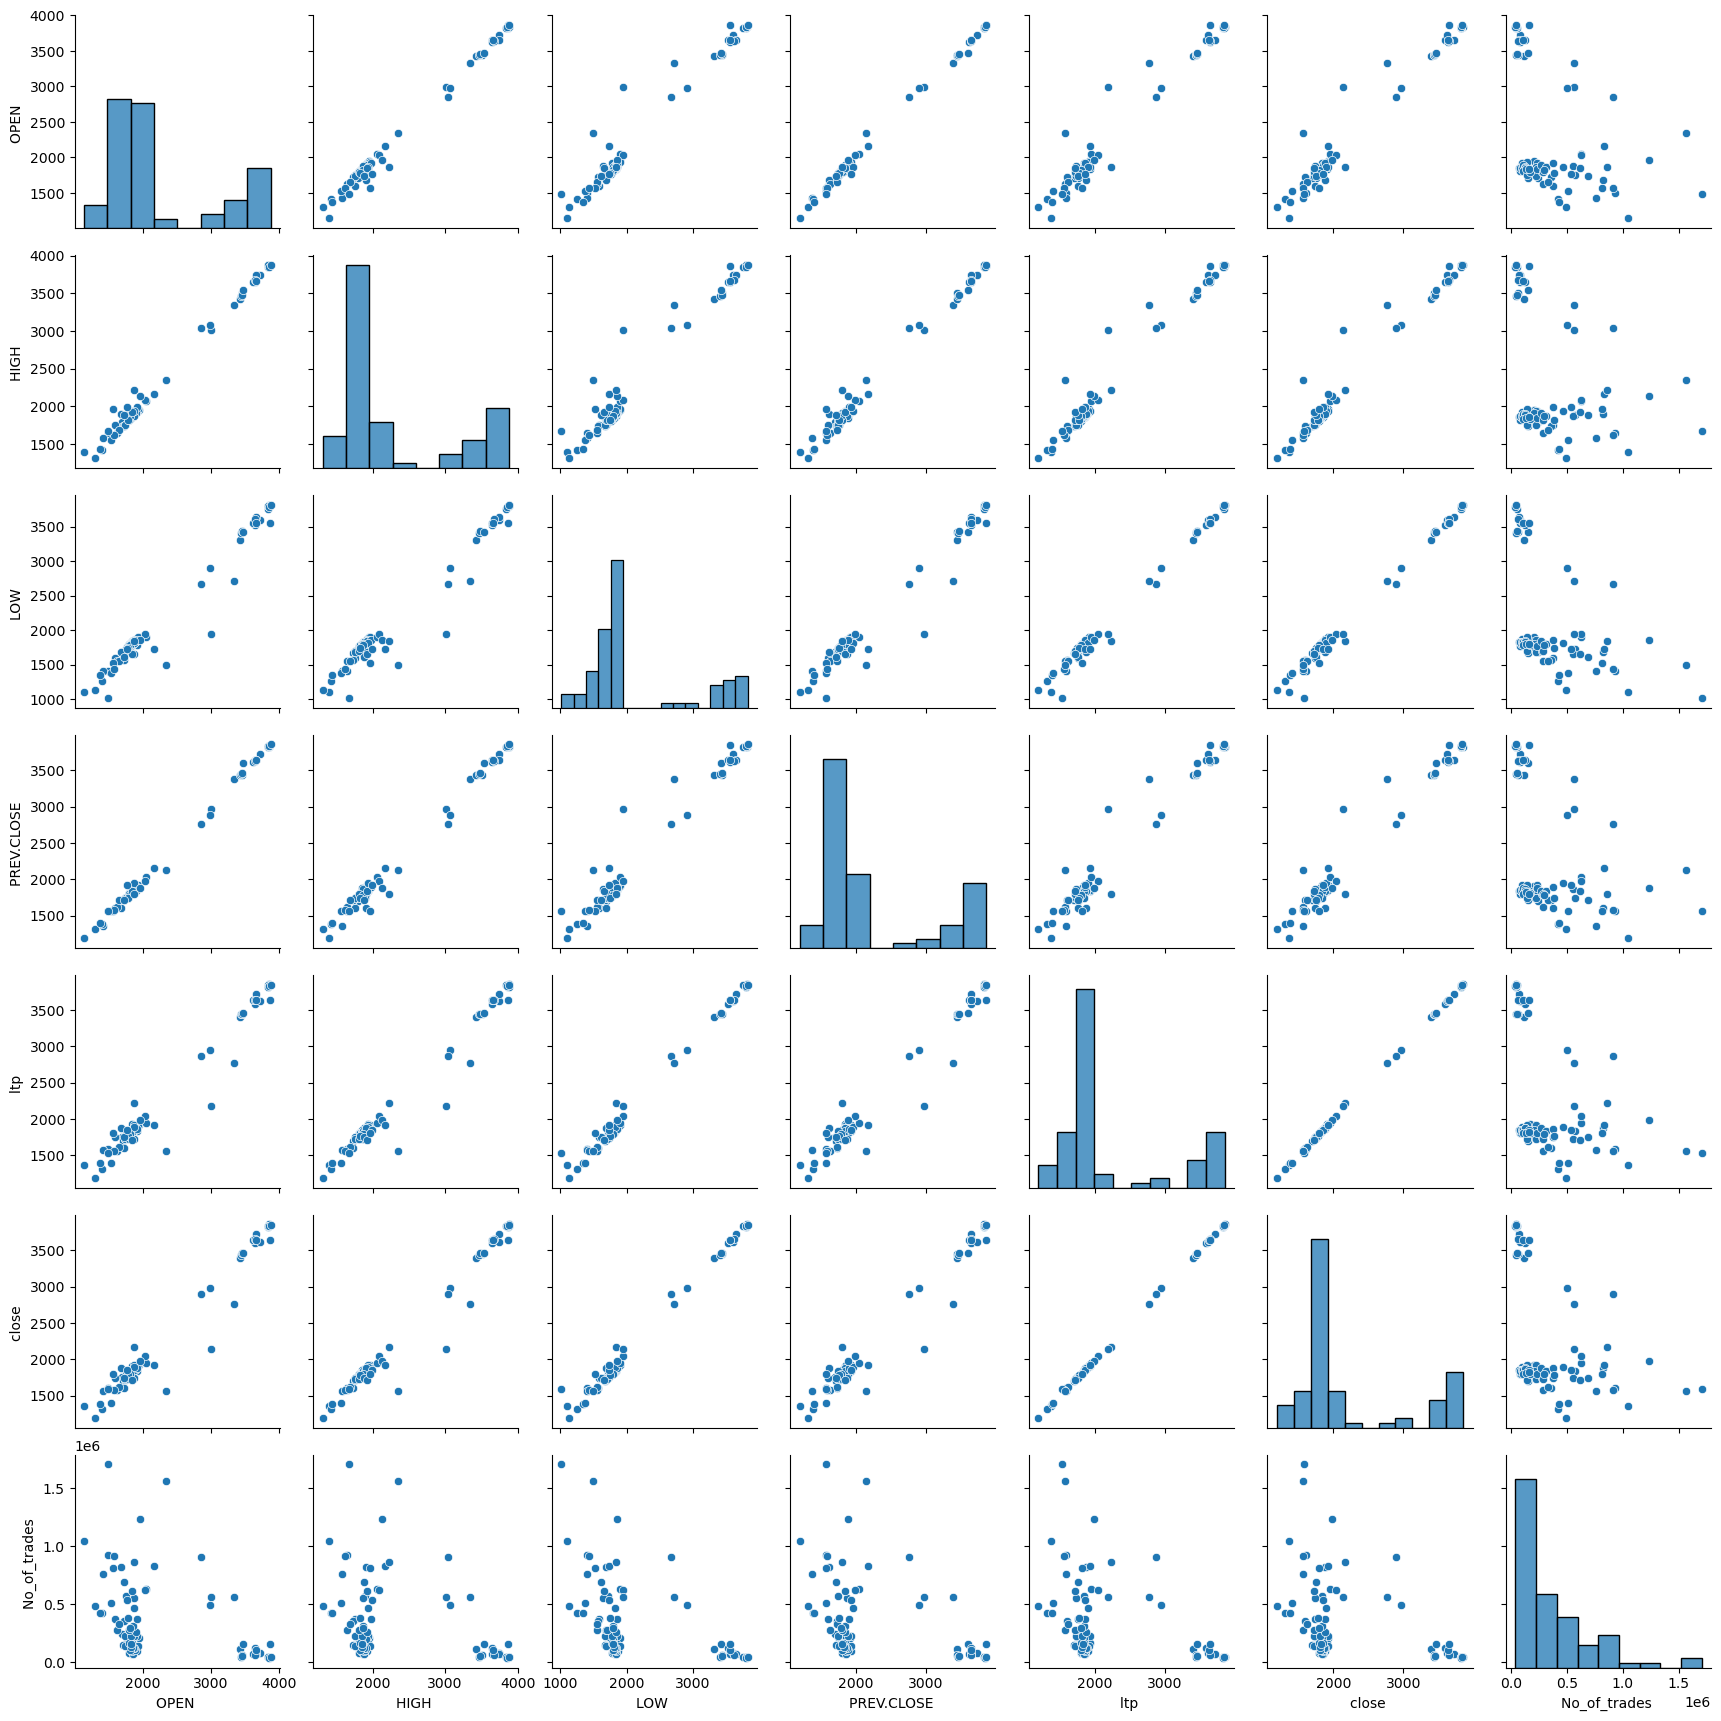

In [23]:
sns.pairplot(data=df)
plt.show();

## <CENTER>OUTLIER TREATMENT

In [24]:
def outlier_limit(col):
    Q3,Q1=np.nanpercentile (col,[75,25])
    IQR=Q3-Q1
    UL=Q3+1.5*IQR
    LL=Q1-1.5*IQR
    return UL,LL

In [25]:
for column in df.columns:
    if df[column].dtype!='object':
       UL,LL=outlier_limit(df[column])
       df[column]=np.where((df[column]>UL)|(df[column]<LL),np.nan,df[column])

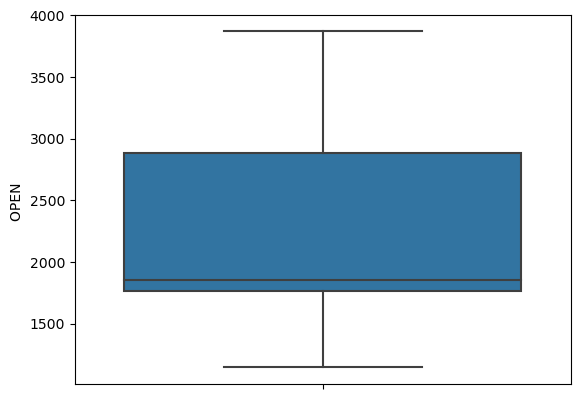

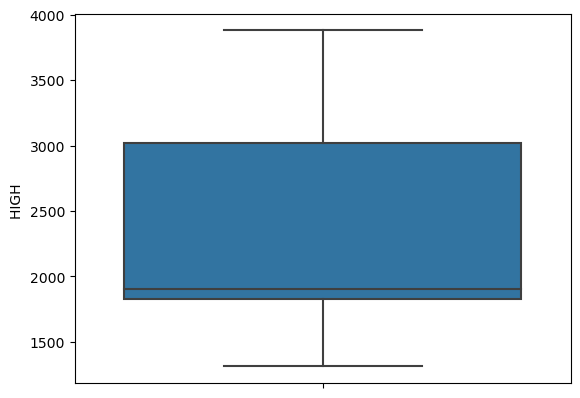

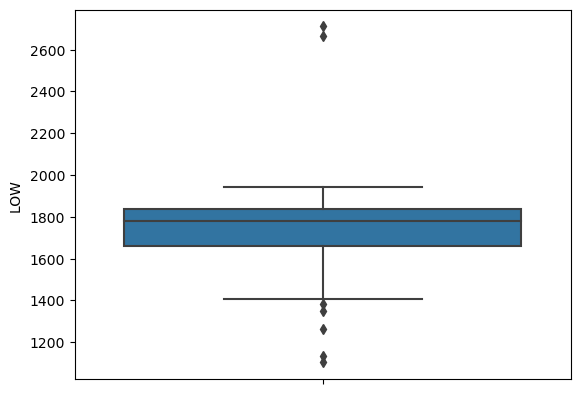

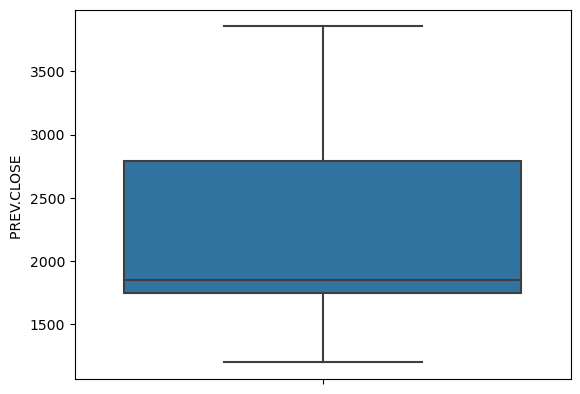

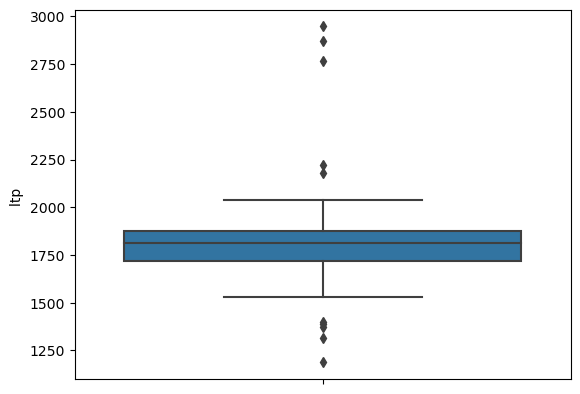

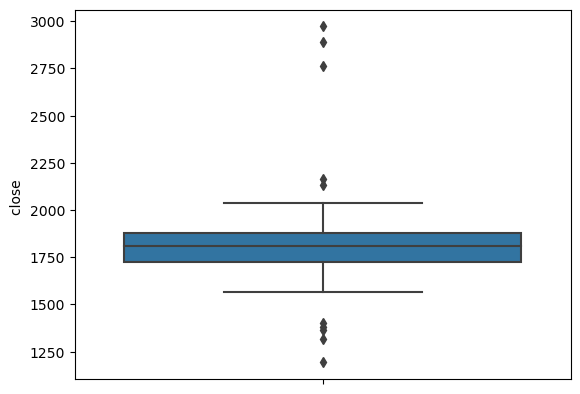

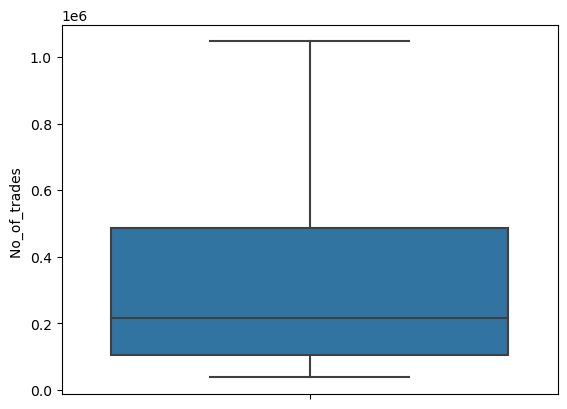

In [26]:
for i in df.columns:
    if df[i].dtype!='object':
        sns.boxplot(y=df[i])
        plt.show();

In [27]:
df.dropna(inplace=True)

## LABEL ENCODING

In [28]:
cols=[ 'series ', 'OPEN ', 'HIGH ', 'LOW ', 'PREV.CLOSE ', 'ltp ','close ', 'vwap ','VOLUME ', 'VALUE ','No_of_trades ']
le=LabelEncoder()
df[cols]=df[cols].apply(le.fit_transform)

## <CENTER> CHECKING CORRELATION USING HEATMAP

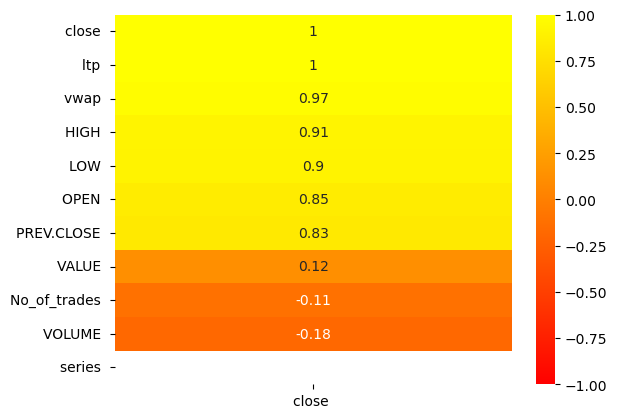

In [29]:
sns.heatmap(df.corr()[['close ']].sort_values(by='close ',
                                                ascending=False),vmin=-1,vmax=1,annot=True,cmap="autumn");

### SELECTING X & Y

In [30]:
x=df[['OPEN ', 'HIGH ', 'LOW ', 'PREV.CLOSE ', 'ltp ','vwap ']].values

In [31]:
y=df[['close ']].values

### SCALING

In [32]:
sc=StandardScaler()

In [33]:
x=sc.fit_transform(x)

## CROSS VALIDATION

In [34]:
models={
    'LinearRegression':LinearRegression(),
    "Ridge":Ridge(),
    "LinearSVR":LinearSVR(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "GradientBoostingRegressor":GradientBoostingRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "RandomForestRegressor":RandomForestRegressor()
}

In [35]:
for name,model in models.items():
    scores=cross_val_score(model, x,y,scoring="neg_mean_squared_error",cv=10,n_jobs=-1)
    print("cross validation model:{}".format(name))
    rmse=np.sqrt(-scores)
    rmse_average =np.mean(rmse)
    print("AVERAGE RMSE:",rmse_average)
    print("*"*100)

cross validation model:LinearRegression
AVERAGE RMSE: 1.5085175787981633
****************************************************************************************************
cross validation model:Ridge
AVERAGE RMSE: 1.6037886771573249
****************************************************************************************************
cross validation model:LinearSVR
AVERAGE RMSE: 2.6817955213782474
****************************************************************************************************
cross validation model:DecisionTreeRegressor
AVERAGE RMSE: 2.5853945298907073
****************************************************************************************************
cross validation model:GradientBoostingRegressor
AVERAGE RMSE: 2.171007679017488
****************************************************************************************************
cross validation model:AdaBoostRegressor
AVERAGE RMSE: 2.381485416799623
**************************************************************

## MODEL BUILDING USING LINEAR REGRESSION

In [36]:
model=LinearRegression()

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [38]:
model.fit(x_train,y_train)

LinearRegression()

In [39]:
y_pred=model.predict(x)

## <CENTER> PREDICTING Y

In [40]:
OUTPUT=pd.DataFrame(zip(y,y_pred),columns=("ACTUAL","PREDICTED"),dtype=float)
OUTPUT.head()

,ACTUAL,PREDICTED
0,43.0,43.856432
1,47.0,46.289923
2,45.0,46.482971
3,30.0,31.298264
4,46.0,45.751820


## SCATTERPLOT

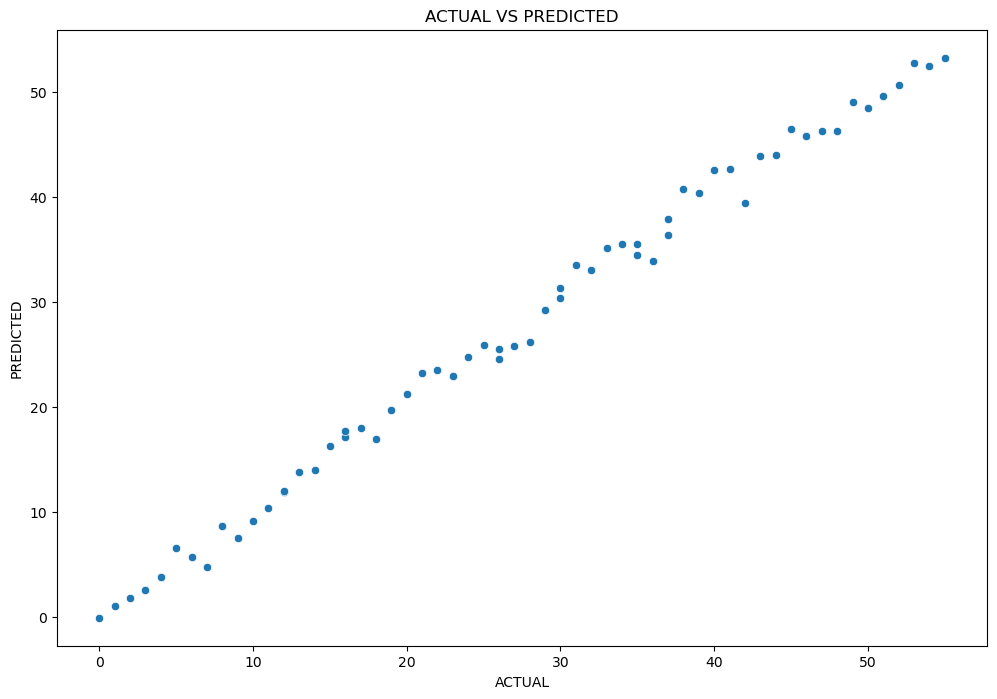

In [41]:
plt.figure(figsize=(12,8))
plt.title('ACTUAL VS PREDICTED')
sns.scatterplot(data=OUTPUT,x="ACTUAL",y="PREDICTED");

### SCORE

In [42]:
model.score(x,y)*100

99.31471637342372